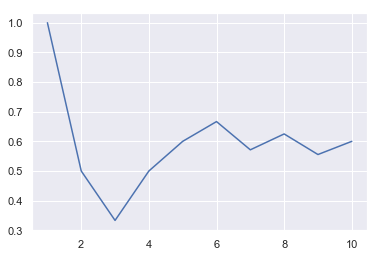

In [18]:
# Asymptotics. (Slides for this and other Data Science courses may be found at github https://github.com/DataScienceSpecialization/courses/. If you
# care to use them, they must be downloaded as a zip file and viewed locally. This lesson corresponds to 07_Statistical_Inference/07_Asymptopia.)

# In this lesson, we'll discuss asymptotics, a topic which describes how statistics behave as sample sizes get very large and approach infinity.
# Pretending sample sizes and populations are infinite is useful for making statistical inferences and approximations since it often leads to a nice
# understanding of procedures.

# Asymptotics generally give no assurances about finite sample performance, but they form the basis for frequency interpretation of probabilities
# (the long run proportion of times an event occurs).

# The Law of Large Numbers (LLN) says that the average (mean) approaches what it's estimating. We saw in our simulations that the larger the sample
# size the better the estimation.  As we flip a fair coin over and over, it eventually converges to the true probability of a head (.5).

# The LLN forms the basis of frequency style thinking.

# To see this in action, we've copied some code from the slides and created the function coinPlot. It takes an integer n which is the number of coin
# tosses that will be simulated. As coinPlot does these coin flips it computes the cumulative sum (assuming heads are 1 and tails 0), but after each
# toss it divides the cumulative sum by the number of flips performed so far. It then plots this value for each of the k=1...n tosses. Try it now for
# n=10.
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

def coin_plot(n):
    toses = [1 if v > 0.5 else 0 for v in np.random.random_sample(n)]
    means = np.cumsum(toses) / (range(1, n+1))
    ax = sns.lineplot(x=range(1, n+1), y=means)

coin_plot(10)

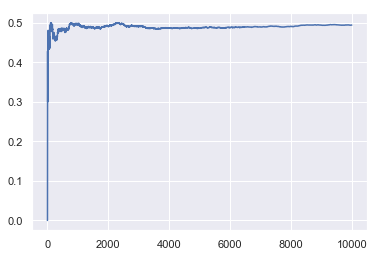

In [20]:
# Your output depends on R's random number generator, but your plot probably jumps around a bit and, by the 10th flip, your cumulative sum/10 is
# probably different from mine. If you did this several times, your plots would vary quite a bit. Now call coinPlot again, this time with 10000 as
# the argument.
coin_plot(10000)

In [21]:
# See the difference? Asymptotics in Action! The line approaches its asymptote of .5. This is the probability you expect since what we're plotting,
# the cumulative sum/number of flips, represents the probability of the coin landing on heads. As we know, this is .5 .

# We say that an estimator is CONSISTENT if it converges to what it's trying to estimate. The LLN says that the sample mean of iid samples is
# consistent for the population mean. This is good, right?

In [22]:
# Now let's talk about confidence intervals.

# It follows that 5% of the area under the curve is not shaded. By symmetry of the curve, only 2.5% of the data is greater than the mean + 2 standard
# deviations (mu+2*sigma/sqrt(n)) and only 2.5% is less than the mean - 2 standard deviations (mu-2*sigma/sqrt(n)).

# So the probability that the sample mean X' is bigger than mu + 2sigma/sqrt(n) OR smaller than mu-2sigma/sqrt(n) is 5%.  Equivalently, the
# probability of being between these limits is 95%. Of course we could have different sizes of intervals. If we wanted something other than 95, then
# we would use a quantile other than 2.

# The quantity X' plus or minus 2 sigma/sqrt(n) is called a 95% interval for mu. The 95% says that if one were to repeatedly get samples of size n,
# about 95% of the intervals obtained would contain mu, the quantity we're trying to estimate.

# Use the R function qnorm to find the 95th quantile for a standard normal distribution. Remember that qnorm takes a probability as an input. You can
# use default values for all the other arguments.

from scipy.stats import norm
norm.ppf(.95)

1.6448536269514722

In [23]:
# Another technique for calculating confidence intervals for binomial distributions is to replace p with p'. This is called the Wald confidence
# interval. We can also use the R function qnorm to get a more precise quantile value (closer to 1.96) instead of our ballpark estimate of 2.

# With the formula p'+/- qnorm(.975)*sqrt(p'(1-p')/100), use the p' and n values from above and the R construct p'+c(-1,1)... to handle the
# plus/minus portion of the formula. You should see bounds similar to the ones you just estimated.
import math

def wald_confidence(p):
    def formula(p, c):
        return p + c * norm.ppf(.975) * math.sqrt(p*(1-p)/100)
    return (formula(p, -1), formula(p, 1))

wald_confidence(.6)

(0.5039817664728938, 0.6960182335271061)

In [35]:
# As an alternative to this Wald interval, we can also use the R function binom.test with the parameters 60 and 100 and let all the others default.
# This function "performs an exact test of a simple null hypothesis about the probability of success in a Bernoulli experiment." (This means it
# guarantees the coverages, uses a lot of computation and doesn't rely on the CLT.) 

from scipy.stats import binom_test

p_value = binom_test(60, 100)
p_value

0.05688793364098078